In [ ]:
!nvidia-smi

Mon Sep  4 05:35:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.5/7.5 MB 30.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 719.8/719.8 kB 37.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81.1/81.1 kB 7.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 64.8/64.8 kB 7.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 268.8/268.8 kB 27.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 72.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [ ]:
import torch
import json
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/New folder

/content/drive/MyDrive/New folder


In [ ]:
df = pd.read_csv("final_details.csv")


In [ ]:
df=df.drop_duplicates(subset=['url'])
df = df[df.types != '[]']
df.describe()

title  \
count    18397   
unique   17332   
top     Paella   
freq        24   

                                                                              url  \
count                                                                       18397   
unique                                                                      18397   
top     https://eatsmarter.com/recipes/cucumber-sandwiches-with-fresh-goat-cheese   
freq                                                                            1   

       description                 types  
count        18396                 18397  
unique       14719                 17254  
top        30 mins  ['None', 'low-carb']  
freq           320                   157

In [ ]:
df = df.dropna().reset_index(drop=True)
df.shape

(18396, 4)

In [ ]:
import ast

for i in range(len(df.types)):
  try:
    list_1 = ast.literal_eval(df.types[i])
    if isinstance(list_1, list):
      df.types[i] = list_1
  except (ValueError, SyntaxError):
    pass

In [ ]:
 types_list = df.types.to_list()

In [ ]:
mapping = {
    'Onion': 'Vegetable',
    'Poultry': 'Chicken',
    'saltwater\xa0Fish': 'saltwater fish',
    'Root Vegetable': 'Vegetable',
    'High-fiber Vegetarian Dish':'Vegetarian',
    'flowering vegetables':'Vegetable',
    'baked dish':'Baking',
    'leafy green vegetable':'Vegetable',
    'Gluten-free Dinner':'Gluten-free',
    'Gluten-free Vegetarian Recipe':'Gluten-free',
    'Gluten-free Lunch':'Gluten-free',
    'Vegetarian Entree': 'Vegetarian',
    'Vegetarian Lunch':'Vegetarian',
    'Vegetarian Dinner':'Vegetarian',
    'Side Salad':'salad',
    'dessert':'Dessert'
}

for sublist in types_list:
    for i in range(len(sublist)):
        sublist[i] = mapping.get(sublist[i], sublist[i])

types_list[1]

['Finger Food',
 'Low-cholesterol',
 'Fitness',
 'Healthy Eating',
 'Low-calorie',
 'Low-calorie Meat Dish',
 '250-400 Calorie',
 'low-carb',
 'non-alcoholic',
 'egg-free',
 'Pescetarian',
 'Special',
 '25-Minute',
 'Buffet',
 'Exotic',
 'Cooking on vacation',
 'festively',
 'Meal for Four',
 'Garden Party',
 'Guest',
 'Party',
 'Picnic',
 'Cooking',
 'Fish',
 'Vegetable',
 'Vegetable',
 'Vegetable',
 'Herb',
 'Dairy',
 'Fruit',
 'Brunch',
 'Snack',
 'Party Snack',
 'Party Snack',
 'Tapas',
 'Appetizer']

In [ ]:
for sublist in types_list:
    new_sublist = []
    for item in sublist:
        if item not in ['Family','skillet dish','Glyx','Classic', 'Spices','Meal for Four','Home Cooking', 'Side Dish','Grain','Primi Piatti','Main Course','Spring','Dinner','Lunch','Light Cooking','Herb','Casserole','Legume','Sauce','Clean Eating','Healthy Eating','Party Snack','Pescetarian','Picnic','Garden Party','Party','Stomach Discomfort','everyday meal','Elevated Blood Lipid','Crohn&#039;s Disease','European','Course','Main Course''Meal for Four','Menu', 'Guest', 'Easy', 'Lactation', 'Quick','Cooking','Osteoarthritis','Stress','Iron Deficiency','Cooking on vacation','Pregnancy','Fertility']:
            new_sublist.append(item)
    sublist[:] = new_sublist
types_list[1]

['Finger Food',
 'Low-cholesterol',
 'Fitness',
 'Low-calorie',
 'Low-calorie Meat Dish',
 '250-400 Calorie',
 'low-carb',
 'non-alcoholic',
 'egg-free',
 'Special',
 '25-Minute',
 'Buffet',
 'Exotic',
 'festively',
 'Fish',
 'Vegetable',
 'Vegetable',
 'Vegetable',
 'Dairy',
 'Fruit',
 'Brunch',
 'Snack',
 'Tapas',
 'Appetizer']

In [ ]:
for i in range (len(types_list)):
  types_list[i]=types_list[i][:10]

types_list[1]

['Finger Food',
 'Low-cholesterol',
 'Fitness',
 'Low-calorie',
 'Low-calorie Meat Dish',
 '250-400 Calorie',
 'low-carb',
 'non-alcoholic',
 'egg-free',
 'Special']

In [ ]:
for sublist in types_list:
    sublist[:] = list(set(sublist))
types_list[1]

['low-carb',
 '250-400 Calorie',
 'Low-calorie',
 'non-alcoholic',
 'Low-cholesterol',
 'Low-calorie Meat Dish',
 'Finger Food',
 'Special',
 'Fitness',
 'egg-free']

In [ ]:
df.types=types_list

In [ ]:
df

title  \
0         Cucumber Sandwiches with Fresh Goat Cheese   
1      Smoked Trout Tartare with Avocado Mango Salsa   
2                                  Basic Tofu Recipe   
3             Grilled Watermelon with Herbed Ricotta   
4          Egg Bites with Smoked Salmon and Broccoli   
...                                              ...   
18391                     Sausage and Ham Croissants   
18392                        Shakshuka with Eggplant   
18393                                  Currant Jelly   
18394                       Multi-Grain Walnut Bread   
18395                     Homemade Red Currant Jelly   

                                                                                url  \
0         https://eatsmarter.com/recipes/cucumber-sandwiches-with-fresh-goat-cheese   
1      https://eatsmarter.com/recipes/smoked-trout-tartare-with-avocado-mango-salsa   
2                                  https://eatsmarter.com/recipes/basic-tofu-recipe   
3             https://eatsmarter.com/recipes/grilled-watermelon-with-herbed-ricotta   
4          https://eatsmarter.com/recipes/egg-bites-with-smoked-salmon-and-broccoli   
...                                                                             ...   
18391                     https://eatsmarter.com/recipes/sausage-and-ham-croissants   
18392                        https://eatsmarter.com/recipes/shakshuka-with-eggplant   
18393                                https://eatsmarter.com/recipes/currant-jelly-1   
18394                       https://eatsmarter.com/recipes/multi-grain-walnut-bread   
18395                     https://eatsmarter.com/recipes/homemade-red-currant-jelly   

                                                                                                                                                                                                                                                                                                                                 description  \
0                                                             Due to the high water content, the vegetables are very helpful for weight loss. 100 grams of cucumber provide just 12 calories. Cucumbers also contain¬†potassium, iron, zinc,¬†fluorine, and some vitamin C. With the goat's cheese comes satiating protein between the slices.   
1      The sulfur substances contained in chives are responsible for their slight pungency. They provide a slight antibacterial effect and have a positive effect on digestion. If things run smoothly in the intestines, our concentration is also ensured. This is also supported by the omega-3 fatty acids from the smoked salmon trout.   
2                                                                       Do you have a sensitive stomach? Then tofu is perfect for you, because it's easy on the stomach and doesn't put a strain on digestion. Great veggie option: With around 15 percent vegetable protein, soy cheese gives us about as much as most types of meat offer.   
3                            Despite the fruity-sweet taste of Watermelons there is relatively little sugar in it. On top, the fruit provides plenty of liquid for a refreshing feast on hot summer days. Essential oils from Cress help to get disease-causing bacteria under control. For example, cold symptoms can subside more quickly.   
4                                                                                                                                                                Eggs contain a lot of biotin. This B vitamin promotes hair growth and a healthy nail bed. In addition, the substance is needed for all metabolic processes in the organism.   
...                                                                                                                                                                                                                                                                                                                    

In [ ]:
types_list = df.types.to_list()
type_count = {}
for type1 in types_list:
  if isinstance(type1, list):
    type_list = type1
  else:
    type_list = eval(type1)
  for type2 in type_list:
    if type2 in type_count.keys():
      type_count[type2] += 1
    else:
      type_count[type2] = 1
print(f"Number of types: {len(type_count)}")
print(type_count)

Number of types: 1028
{'low-carb': 5251, 'Vegetable': 6282, 'Cheese': 730, '250-400 Calorie': 722, 'Low-calorie': 243, 'non-alcoholic': 1204, 'Low-cholesterol': 828, 'Low-calorie Meat Dish': 4, 'Finger Food': 221, 'Special': 50, 'Fitness': 150, 'egg-free': 672, 'nutritional': 1003, 'High-protein': 1501, 'Mineral-rich': 524, 'Gluten-free': 931, 'Tofu': 95, 'lactose-free': 840, 'Gluten-free Vegan Recipe': 148, 'Gluten-free Snack': 115, 'vegetarian grilling': 27, 'low-carb dinner': 192, '100-250 Calorie': 411, 'Gluten-free Fish Recipe': 72, 'Baking': 2256, 'pastry': 510, 'North America': 475, 'regional': 267, 'muffin': 77, 'Snack': 661, 'Gluten-free Dessert': 96, 'Lactose-free Snacks': 62, 'high-fiber': 1145, 'High-fiber Snack': 90, 'Lactose-free Dessert': 42, 'Snack for Kids': 30, 'Vegan Dessert': 62, 'cooking for kids': 86, 'Children&#039;s Party': 29, 'Vegan Snack': 84, 'birthday for kids': 24, 'Vegan': 644, 'Skinny Diet': 43, 'High-fiber Fish Dish': 100, 'Stew': 291, 'High-fiber Soup'

In [ ]:
threshold = int(len(df) * 0.02)
rare_types = [key for key, value in type_count.items() if value < threshold]
len(rare_types), rare_types[:10]

(970,
 ['Low-calorie',
  'Low-calorie Meat Dish',
  'Finger Food',
  'Special',
  'Fitness',
  'Tofu',
  'Gluten-free Vegan Recipe',
  'Gluten-free Snack',
  'vegetarian grilling',
  'low-carb dinner'])

In [ ]:
types_list
revised_types_list = []
indices_to_drop = []

for idx, types in enumerate(types_list):
  if isinstance(types, list):
    type_list = types
  else:
    type_list = eval(types)

  revised_types = []

  for type1 in type_list:
    if type1 not in rare_types:
      revised_types.append(type1)

  if len(revised_types) == 0:
    indices_to_drop.append(idx)
  else:
    revised_types_list.append(revised_types)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(18302, 4)

In [ ]:
df['revised_types'] = revised_types_list

In [ ]:
df.tail()

title  \
18297  Sausage and Ham Croissants   
18298     Shakshuka with Eggplant   
18299               Currant Jelly   
18300    Multi-Grain Walnut Bread   
18301  Homemade Red Currant Jelly   

                                                             url  \
18297  https://eatsmarter.com/recipes/sausage-and-ham-croissants   
18298     https://eatsmarter.com/recipes/shakshuka-with-eggplant   
18299             https://eatsmarter.com/recipes/currant-jelly-1   
18300    https://eatsmarter.com/recipes/multi-grain-walnut-bread   
18301  https://eatsmarter.com/recipes/homemade-red-currant-jelly   

                                                                                                                                                                                                                      description  \
18297                                           Roll the dough on a lightly floured surface to 4-5 mm (approximately 1/8 inch) thick. Cut into 3 cm (approximately 1 1/4 inch) wide and 20 cm (approximately 8 inch) long strips.   
18298  This¬†delicious vegetable and egg shakshuka dish¬†is packed with a slew of vitamins and minerals thanks to the vegetable mixture as well as powerful protein from the eggs. Shakshukas are versatile and are a complete meal   
18299                                                                                                                                   Remove the jelly¬†from the pan, and place on a long platter. Serve with bread and cheese.¬†   
18300                                       Add both flours, the shredded wheat, ground walnuts ¬†and salt¬†and knead with the dough hook until smooth. Cover and let rise in a warm place until doubled in bulk, about 45 minutes.   
18301                           Bring the mixture to a boil, and cook for 4 minutes. Fill the jelly into the sterilized prepared jars. Seal tightly, and turn upside down for 15 minutes. Turn right side up and cool completely.   

                                                                                                                                               types  \
18297                                                                         [250-400 Calorie, Quark-oil Dough, Dairy, Pork, Breakfast, Eggs, Milk]   
18298  [skillet vegetables, What to Cook on Sunday?, Rustic, Baking, What to Cook on the Weekend?, North America, Family, Tunisian, Eggs, soul food]   
18299                            [non-alcoholic, Low-cholesterol, Vegetarian, Gluten-free, Low-fat, fat-free, Vegan, lactose-free, Low-sugar, Jelly]   
18300                                   [Bread Dough, Nut, Rustic, crowdpleaser, Country Style, Baking, Brunch, Yeast Dough, Bread, weekend cooking]   
18301                                       [marmalade, Summer, In a jar, Red Currant Jam, Fruit, Sweet, Pressure cooking, Red Currant Jelly, Jelly]   

                                                                                            revised_types  
18297                                                                [250-400 Calorie, Dairy, Pork, Eggs]  
18298                                                               [Baking, North America, Family, Eggs]  
18299  [non-alcoholic, Low-cholesterol, Vegetarian, Gluten-free, Low-fat, Vegan, lactose-free, Low-sugar]  
18300                                                                                            [Baking]  
18301                                                                                             [Fruit]

In [ ]:
revised_types_list = df.revised_types.to_list()
revised_types_list

[['low-carb', 'Vegetable', 'Cheese'],
 ['low-carb',
  '250-400 Calorie',
  'non-alcoholic',
  'Low-cholesterol',
  'egg-free'],
 ['low-carb',
  'nutritional',
  'High-protein',
  'non-alcoholic',
  'Low-cholesterol',
  'Mineral-rich',
  'Gluten-free',
  'lactose-free'],
 ['low-carb', 'nutritional', 'Gluten-free', '100-250 Calorie'],
 ['low-carb',
  'nutritional',
  'Baking',
  'pastry',
  'North America',
  'Gluten-free'],
 ['nutritional', 'Snack', 'high-fiber', 'Gluten-free', 'lactose-free'],
 ['low-carb', 'nutritional', 'Vegan'],
 ['High-protein', 'high-fiber', 'diet'],
 ['low-carb', 'High-protein', 'non-alcoholic', 'Gluten-free', 'diet'],
 ['low-carb', 'Pasta', 'nutritional'],
 ['Low-cholesterol',
  'Mineral-rich',
  'non-alcoholic',
  'meat-free',
  'Gluten-free',
  'egg-free'],
 ['low-carb', 'Low-cholesterol', 'Fruit', 'Fish'],
 ['High-protein', 'high-fiber', 'Fish', 'diet'],
 ['nutritional',
  'high-fiber',
  'Vegetarian',
  'Gluten-free',
  'lactose-free',
  '100-250 Calorie'],


In [ ]:
revised_types_list
revised_type_count = {}
for types in revised_types_list:
  type_list = types
  for type1 in type_list:
    if type1 in revised_type_count.keys():
      revised_type_count[type1] += 1
    else:
      revised_type_count[type1] = 1
print(f"Number of types: {len(revised_type_count)}")
print(revised_type_count)

Number of types: 58
{'low-carb': 5251, 'Vegetable': 6282, 'Cheese': 730, '250-400 Calorie': 722, 'non-alcoholic': 1204, 'Low-cholesterol': 828, 'egg-free': 672, 'nutritional': 1003, 'High-protein': 1501, 'Mineral-rich': 524, 'Gluten-free': 931, 'lactose-free': 840, '100-250 Calorie': 411, 'Baking': 2256, 'pastry': 510, 'North America': 475, 'Snack': 661, 'high-fiber': 1145, 'Vegan': 644, 'diet': 1703, 'Pasta': 2673, 'meat-free': 582, 'Fruit': 1584, 'Fish': 1738, 'Vegetarian': 2071, 'Meat': 2172, 'Beef': 532, 'mushroom': 550, 'salad': 2924, 'Eggs': 819, 'Seafood': 741, 'soup': 753, 'German': 437, 'Dessert': 2005, 'Low-sugar': 389, 'Side Salad': 369, 'fruit-vegetable': 2325, 'saltwater fish': 1202, 'Vegetable Salad': 1061, 'Chicken': 1425, 'Asian': 1062, 'Appetizer': 453, 'Tropical Fruit': 786, 'Roast': 969, 'Shrimp': 595, 'Sprout': 786, 'Shellfish': 423, 'Family': 418, 'Low-fat': 561, 'Italian': 1048, 'Pork': 400, 'American': 418, 'Dairy': 471, 'Dough': 2481, 'dessert': 591, 'Rice': 172

In [ ]:
revised_type_count.keys()

dict_keys(['low-carb', 'Vegetable', 'Cheese', '250-400 Calorie', 'non-alcoholic', 'Low-cholesterol', 'egg-free', 'nutritional', 'High-protein', 'Mineral-rich', 'Gluten-free', 'lactose-free', '100-250 Calorie', 'Baking', 'pastry', 'North America', 'Snack', 'high-fiber', 'Vegan', 'diet', 'Pasta', 'meat-free', 'Fruit', 'Fish', 'Vegetarian', 'Meat', 'Beef', 'mushroom', 'salad', 'Eggs', 'Seafood', 'soup', 'German', 'Dessert', 'Low-sugar', 'Side Salad', 'fruit-vegetable', 'saltwater fish', 'Vegetable Salad', 'Chicken', 'Asian', 'Appetizer', 'Tropical Fruit', 'Roast', 'Shrimp', 'Sprout', 'Shellfish', 'Family', 'Low-fat', 'Italian', 'Pork', 'American', 'Dairy', 'Dough', 'dessert', 'Rice', 'Pome Fruit', 'Fruit Dessert'])

In [ ]:
encode_types = { key: idx for idx, (key, value) in enumerate(revised_type_count.items())}
with open("recipe_types_encoded.json", "w") as fp:
  json.dump(encode_types, fp)

In [ ]:
categorical_type_list = []
revised_types_list

for type5 in revised_types_list:
  categorical_list = [0] * len(encode_types)
  for type1 in type5:
    type1_index = encode_types[type1]
    categorical_list[type1_index] = 1
  categorical_type_list.append(categorical_list)

categorical_type_list[3][:45]

[0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
df['type_cat_list'] = categorical_type_list
df.head()

title  \
0     Cucumber Sandwiches with Fresh Goat Cheese   
1  Smoked Trout Tartare with Avocado Mango Salsa   
2                              Basic Tofu Recipe   
3         Grilled Watermelon with Herbed Ricotta   
4      Egg Bites with Smoked Salmon and Broccoli   

                                                                            url  \
0     https://eatsmarter.com/recipes/cucumber-sandwiches-with-fresh-goat-cheese   
1  https://eatsmarter.com/recipes/smoked-trout-tartare-with-avocado-mango-salsa   
2                              https://eatsmarter.com/recipes/basic-tofu-recipe   
3         https://eatsmarter.com/recipes/grilled-watermelon-with-herbed-ricotta   
4      https://eatsmarter.com/recipes/egg-bites-with-smoked-salmon-and-broccoli   

                                                                                                                                                                                                                                                                                                                             description  \
0                                                         Due to the high water content, the vegetables are very helpful for weight loss. 100 grams of cucumber provide just 12 calories. Cucumbers also contain¬†potassium, iron, zinc,¬†fluorine, and some vitamin C. With the goat's cheese comes satiating protein between the slices.   
1  The sulfur substances contained in chives are responsible for their slight pungency. They provide a slight antibacterial effect and have a positive effect on digestion. If things run smoothly in the intestines, our concentration is also ensured. This is also supported by the omega-3 fatty acids from the smoked salmon trout.   
2                                                                   Do you have a sensitive stomach? Then tofu is perfect for you, because it's easy on the stomach and doesn't put a strain on digestion. Great veggie option: With around 15 percent vegetable protein, soy cheese gives us about as much as most types of meat offer.   
3                        Despite the fruity-sweet taste of Watermelons there is relatively little sugar in it. On top, the fruit provides plenty of liquid for a refreshing feast on hot summer days. Essential oils from Cress help to get disease-causing bacteria under control. For example, cold symptoms can subside more quickly.   
4                                                                                                                                                            Eggs contain a lot of biotin. This B vitamin promotes hair growth and a healthy nail bed. In addition, the substance is needed for all metabolic processes in the organism.   

                                                                           types  \
0                                                  [low-carb, Vegetable, Cheese]   
1           [Finger Food, Healthy Eating, Low-calorie, Low-cholesterol, Fitness]   
2             [nutritional, Tofu, Healthy Eating, Low-cholesterol, High-protein]   
3  [nutritional, Gluten-free, Healthy Eating, vegetarian grilling, Clean Eating]   
4                             [nutritional, pastry, Gluten-free, muffin, Baking]   

                                                  revised_types  \
0                                 [low-carb, Vegetable, Cheese]   
1                             [Healthy Eating, Low-cholesterol]   
2  [nutritional, Healthy Eating, Low-cholesterol, High-protein]   
3      [nutritional, Gluten-free, Healthy Eating, Clean Eating]   
4                    [nutritional, pastry, Gluten-free, Baking]   

                                                                                                                                         type_cat_list  
0  [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
1  [0, 0, 0, 1, 1, 0, 

In [ ]:
labels = list(encode_types.keys())

In [ ]:
model_name = "distilbert-base-uncased"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('description'), get_y=ColReader('type_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "/content/drive/MyDrive/New folder/dataloaders/dls-multilabel-recipe-classifier13.pkl")

In [ ]:
dls.vocab

['low-carb', 'Vegetable', 'Cheese', 'Healthy Eating', 'Low-cholesterol', 'nutritional', 'High-protein', 'Gluten-free', 'Clean Eating', 'pastry', 'Baking', 'high-fiber', 'diet', 'Fish', 'High-fiber Vegetarian Dish', 'Beef', 'salad', 'Eggs', 'Vegetarian', 'saltwater fish', 'fruit-vegetable', 'Vegetable Salad', 'flowering vegetables', 'Meat', 'Sauce', 'Asian', 'Chicken', 'Dessert', 'Herb', 'baked dish', 'Roast', 'Legume', 'Shrimp', 'Italian', 'soup', 'Seafood', 'non-alcoholic', 'Casserole', 'mushroom', 'Spices', 'leafy green vegetable', 'Sprout', 'Fruit', 'Tropical Fruit', 'Dough', 'Pome Fruit', 'Pasta', 'Rice', 'Fruit Dessert']

In [ ]:
dls.show_batch(dataloaders=dls, max_n=10, trunc_at=256)

In [ ]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.5)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

In [ ]:
learner.freeze()

SuggestedLRs(slide=0.019054606556892395, valley=0.0008317637839354575)

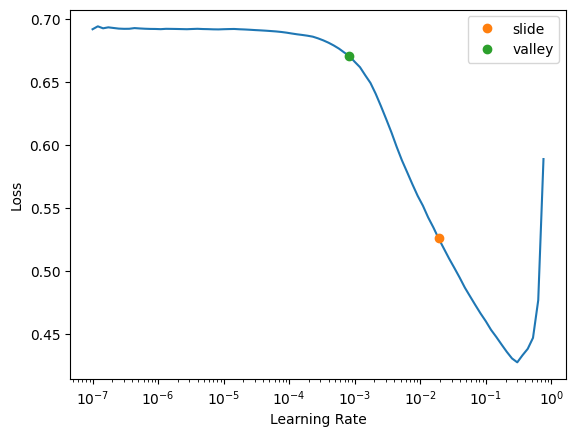

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(5)

In [ ]:
learner.save("recipe-classifier-stage-13")

Path('models/recipe-classifier-stage-13.pth')

In [ ]:
learner.export("/content/drive/MyDrive/New folder/models/recipe-classifier-stage-13.pkl")

SuggestedLRs(slide=0.0004786300996784121, valley=9.120108734350652e-05)

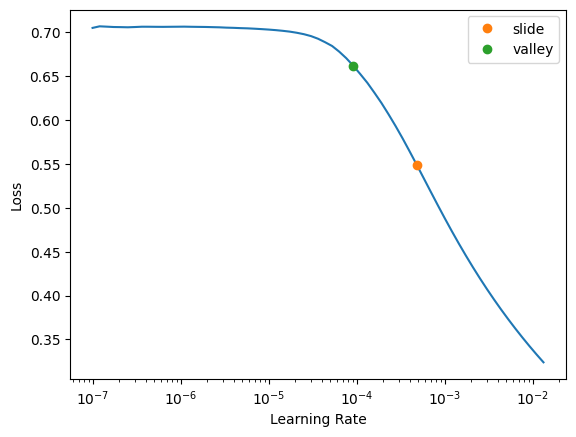

In [ ]:
learner.unfreeze()
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(5)

In [ ]:
learner.save("recipe-classifier-stage-9")

In [ ]:
learner.export("/content/drive/MyDrive/New folder/models/recipe-classifier-stage-9.pkl")